### Training "inspecteur modèles" BNP Paribas - Monte-Carlo methods - December 12-17/2019

# TP 2 - Variance reduction methods

### Exercise 1. Control variate

We consider a stochastic model defined by $Y = f(X)$. The goal is to estimate $m = \mathbb{E}\bigl[g(Y)\bigl]$ for a given function $g$, such that $g(Y)$ is a square integrable random variable.

We are given a simplified model $Y_c = f_c(X)$ such that the value of $m_c = \mathbb{E}\bigl[g(Y_c)\bigl]$ is explicitly known and such that $\mathbb{E}\bigl[g(Y_c)^2\bigl]<\infty$.
In practice, $f_c$ can be a function easier to evaluate (with lower computational cost) than the function $f$, or simply a function such that the expectation $m_c$ can be evaluated explicitly.

We denote $(X_i)_{1\leq i\leq n}$ a sequence of i.i.d. copies of the input random variable $X$, and we set

 \begin{eqnarray*}
 I_n&=&\frac{1}{n}\sum_{i=1}^n g(f(X_i)),\qquad
 I_n^c = m_c + \frac{1}{n} \sum_{i=1}^n \bigl( g(f(X_i)) - g(f_c(X_i)) \bigr) .
 \end{eqnarray*}

####  Question 1 (theoretical):
Check that $I_n$ et $I_n^c$ are unbiased estimators of $\mathbb{E}\bigl[g(Y)\bigl]$, and compute their variances.

####  Question 2 (a):

We assume that the input random variable $X$ follows a uniform distribution on $[0,1]$, and that $f(x)=e^x$, $g(y)=y$, and we choose $f_c(x)=1+x$.

Simulate the two estimators $I_n$ and $I^c_n$ and their $95\%$ confidence intervals.

Plot the trajectories $n \mapsto I_n, I_n^c$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 1000 # Sample size

integers1toN = np.arange(1,N+1) 

############################################
# Compute the exact value of m_c:
# here, m_c = 1+ E[X] with X uniform on [0,1]
m_c = 3/2
############################################

##################################################
# Draw the samples of the random variables Y = f(X)
# and Y_c = f_c(X)
##################################################
X = np.random.uniform(low=0, high=1, size=N)

Y = np.exp(X)

Y_c = 1 + X
############################################

############################################
## Evaluate the two estimators, their empirical
## variances, and their confidence intervals

I = np.mean(Y)
emp_variance_MC = np.var(Y)

I_c = m_c + np.mean(Y - Y_c)
emp_variance_control = np.var(Y - Y_c)

radius_confidence_int = 1.96 * np.sqrt(emp_variance_MC / N)
radius_confidence_int_control = 1.96 * np.sqrt(emp_variance_control / N)

############################################
# The gain in terms of variance
variance_ratio = emp_variance_MC / emp_variance_control
############################################

############################################
# The true value of  E[g(Y)] for comparison
############################################
Exp_gY = np.exp(1.) - 1.

############################################
# Plotting
print("Sample size = %d" %N)
print("True expectation E[g(Y)] = %1.3f \n" %Exp_gY)

print("Standard MC estimator: %1.3f" %I)
print("Confidence interval(95%%) = [%1.3f, %1.3f] \n" \
      %(I - radius_confidence_int, I + radius_confidence_int))

print("Control variate estimator: %1.3f " %I_c)
print("Confidence interval(95%%) = [%1.3f, %1.3f] \n" \
      %(I_c - radius_confidence_int_control, I_c + radius_confidence_int_control))

print("Variance ratio = %1.1f \n" %variance_ratio)

Sample size = 1000
True expectation E[g(Y)] = 1.718 

Standard MC estimator: 1.714
Confidence interval(95%) = [1.684, 1.744] 

Control variate estimator: 1.715 
Confidence interval(95%) = [1.702, 1.728] 

Variance ratio = 5.6 



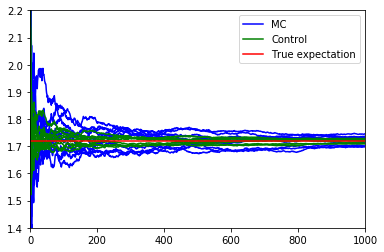

In [5]:
########################
## Plot 10 trajectories
########################

##############################################################
# Simulate M=10 trajectories of the estimators I_n et I_n^c
# Wished size for the arrays: M x N
##############################################################
N = 1000
integers1toN = np.arange(1, N+1)

M = 10

X = np.random.uniform(low=0, high=1, size=(M,N))

Y = np.exp(X)
Y_c = 1 + X

I = np.cumsum(Y, axis=1) / integers1toN
I_c = m_c + np.cumsum(Y - Y_c, axis=1) / integers1toN

############
## Plotting
############
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I[0], color="b", label="MC")
ax.plot(integers1toN, I[1:].T, color="b")

ax.plot(integers1toN, I_c[0], color="g", label="Control")
ax.plot(integers1toN, I_c[1:].T, color="g")
ax.axhline(Exp_gY, color="r", label="True expectation")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

####  Question 2 (b):

Plot the histograms of the (unnormalized) errors

$$\bigl(I^j_N - \mathbb{E}[Y] \bigr)_{1 \le j \le M} \quad \mbox{and}
\qquad \bigl(I^{c,j}_N - \mathbb{E}[Y] \bigr)_{1 \le j \le M}$$

where $\bigl(I^j_N\bigr)_{1\leq j\leq M}$ and $\bigl(I^{c,j}_N\bigr)_{1\leq j\leq M}$ are i.i.d. samples of the two estimators $I$ and $I^c$, for a fixed value of $N$.

In [ ]:
N = 500 
M = 1000 

####################################################
# The exact value of the expectation, for comparison
Esp_gY = np.exp(1.)-1.

############################################
# The exact value of m_c, again
m_c = 1.5

############################################
# Simulate the required samples of Y and Y_c
Y = ????
Y_c = ????
############################################

############################################
# Construct the samples of size M for the
# two estimators, without and with control variate
I_N = ?????
Ic_N = ????

#########################################
## Plot the histograms of the errors

plt.hist( ????? , density="True", bins=int(np.sqrt(M)), label="MC")
plt.hist( ????? , density="True", bins=int(np.sqrt(M)), label="Control")
plt.title("Estimation with and without control variate, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()

####  Question 3:  Optimal control variate

We now introduce a parameter $\lambda$ and consider the estimator 

\begin{eqnarray*}
I_n^\lambda =  \lambda \, m_r + \frac{1}{n}\sum_{i=1}^n \bigl(f(X_i) - \lambda \, f_c(X_i)\bigr),
\qquad \lambda \in \mathbb R.
\end{eqnarray*}

Propose a choice for the parameter $\lambda$.

Plot the trajectoires of the resulting estimator $I_n^\lambda$ and compare them with $I_n$, then compare the histograms of the errors for a fixed value of $n$.

In [ ]:
##############################################
## Empirical estimation of the optimal lambda
##############################################
n_1 = 100
X = np.random.rand(n_1)
Y = np.exp(X)

## Empirical optimal lambda
lambda_opt = ???

print("Estimation of optimal lambda = %1.3f" %lambda_opt)

In [ ]:
#######################################
### For the histograms: M x N samples
#######################################
M = 1000
N = 500
integers1toN = np.arange(1,N+1)

Y = ?????
Y_control = ?????

#####################################
### Plot the first 10 trajectories
#####################################
I_n = np.cumsum(Y[0:10,:], axis=1) / integers1toN
Ic_n = np.cumsum(Y_control[0:10,:], axis=1) / integers1toN

## Plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Control")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="True expectation")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

In [ ]:
#############################################
## For the histograms: evaluate the errors
## of the two estimators I_N et I_N control
#############################################
error_N = ?????
error_control_N = ?????

plt.hist( error_N , density="True", bins=int(np.sqrt(M)), label="MC")

plt.hist( error_control_N, density="True", bins=int(np.sqrt(M)), label="Controle")

plt.title("Estimation with and without control variate, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()

### Exercise 2. Importance sampling

We consider input random variables $Y$ with standard Gaussian distribution $\mathcal N(0,1)$.

The aim is to evaluate $\mathbb E [g(Y)] = \mathbb E \bigl[ (Y - 2)^+ \bigr]$

####  Question 1: standard Monte-Carlo

Simulate and plot the trajectories of the empirical mean estimator $I_n = \frac 1 n \sum_{i=1}^n (Y_i - 2)^+$ obtained from $n$ i.i.d copies $(Y_i)_{1 \le  i \le n}$ of $Y$, then plot the histogram of the errors.

In [ ]:
# Function g: the positive part (x - 2)^+
def g(x):
    return np.maximum(x-2.,0.)

N = 2000
integers1toN = np.arange(1,N+1) 

############################################
# Complete with N draws of the standard
# Gaussian distribution
Y = ?????

# Evaluate the function g(Y) on the sample
GY = ?????

#############################################################
# Stock into the variable 'mean' the MC estimation E[g(Y)],
# into 'var' the empirical variance, and into 'radius_CI'
# the half-lenght of the 95% confidence interval
mean = ?????
var = ?????
radius_conf_int = ?????

print("MC estimation = %1.4f" %mean )
print("95%% confidence interval for E[g(Y)] = [ %1.4f , %1.4f ] \n" \
      %(mean - radius_conf_int, mean + radius_conf_int))
print("Relative error = %1.2f" %(radius_conf_int / mean))

######################################
# Trajectories of the empirical mean
######################################
M = 10 # Number of trajectoires

#####################################################
# Evaluate the M trajectories of the empirical mean
# I_n for n ranging from 1 to N
I_n = ?????

##########################
# Plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(0, 3.e-2)
ax.legend(loc="best")
plt.show()

####  Question 2: Importance sampling

**(a) (theoretical)** Show that, if $\tilde Y$ is a Gaussian random variable centered at $\theta \in \mathbb R$ and with unit variance, then

$$
\mathbb{E} [ g(Y) ]
=
\mathbb{E} \Bigl[ g(\tilde Y) \, e^{-\theta \, \tilde Y + \frac{\theta^2}2} \Bigr],
\qquad \theta \in \mathbb R
$$


What is the interest of such a formula?

**(b)** 
Construct an estimator $J_n$ of $\mathbb{E}[g(Y)]$  based on the simulation of the gaussian distribution with unit variance and centered at $\theta=2$.
 
Plot the trajectories of the estimator $J_n$.

In [ ]:
theta = 2.

N = 2000 # Taille echantillon
integers1toN = np.arange(1,N+1)

###############################################################################
# Complete with N draws of the Gaussian distribution centered at theta = 2
# and evaluate the importance sampling estimator constructed with these N samples
###############################################################################
J_N = ????

# Empirical variance and confidence interval
var_IS = ????
radius_conf_int_IS = ????

############################################
# The gain in terms of variance
variance_ratio = var_IS / var
############################################

print("Importance sampl estimator = %1.4f" %J_N)
print("95%% confidence interval for E[g(Y)] = [ %1.6f , %1.6f ]" \ 
      %(J_N - radius_conf_int_IS, J_N + radius_conf_int_IS))
print("Relative error = %1.4f" %(radius_conf_int_IS / J_N))

####################################################
# Trajectories of the importance sampling estimator
####################################################
M = 10

#######################################################
# Complete with the M trajectories of the IS estimator
# J_n, for n ranging from 1 to N
J_n = ?????

# Plot the M trajectories
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, J_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(0, 3.e-2)
ax.legend(loc="best")
plt.show()

####  Question 3: 
Compare the histograms of the errors of the estimators $I_n$ et $J_n$, for a fixed value of $n$.

In [ ]:
N = 1000  
M = 1000 # Sample size for the histogram of the error

############################################
# Complete with M x N draws 
# + from the distribution N(0,1)
# + and from the distribution N(2,1)
# and evalute the estimators
GY = ?????

GY_importance = ?????

############################################
# Evaluate the errors for the two estimators
# Wished output size: sample of size M
error_MC = ?????
error_Importance = ?????

# Plot the histograms of the errors
plt.hist( ???, normed="True", bins=int(np.sqrt(M)), label="error MC")

plt.hist( ???, normed="True", bins=int(np.sqrt(M)), label="error Imp sampling")

plt.legend(loc="best")

plt.show()

#### $\blacktriangleright$ In practice:

The optimal value $\theta^*$ is the one that minimizes the variance of the importance sampling estimator: 

$$
V(\theta) = 
\mathbb E \left[ g(Y + \theta) \, e^{-2 \, \theta \, Y - \, \theta^2} \right]
-  \mathbb E [g(Y)]^2.
$$

In practice, one can look for a value of $\theta$ that minimizes an empirical approximation $V_n(\theta)$ of $V(\theta)$.

## Application: estimation of VaR

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\VR}{\operatorname{VaR}}$
Let $(X_i)_{i\ge 1}$ be a sequence of i.i.d. random variables with density $f$, assumed to be continuous and strictly positive on an interval $I$ (and zero outside $I$, if $I$ is bounded).
The related _cumulative distribution function_ (cdf) is

$$
F(x) = \mathbb{P}(X_1\leq x) = \int_{-\infty}^x f(u) \textrm{d} u, \qquad x \in \R.
$$

The function $F:\R \rightarrow [0,1]$ being continuous and strictly increasing on $I$ (under the hypotheses above on the density $f$), the quantile function $Q : [0,1] \rightarrow \R \cup \{\pm \infty\} $ is defined by:

$$
Q(u)=F^{-1}(u) \quad \textrm{ for all }  \quad u \in (0,1), 
\qquad Q(0)=\inf I,
\qquad  Q(1)=\sup I.
$$

The goal of this exercise is to estimate the quantile function $Q$ from an i.i.d. sample $X_1, \ldots, X_n$.
When $X$ represents the loss of a position, the $\operatorname{VaR}$ is defined by

$$
\VR(\alpha)=Q(\alpha) \qquad
\quad  0<\alpha<1,
$$

for values of $\alpha$ close to $1$.

We will consider $X_i$ with a standard Gaussian distribution (the functions `norm.cdf` and `norm.ppf` from `scipy.stats` can be used to compute the exact values of $F$ et $Q$).

For every $n$, we denote $(X_{(i)})_{1\leq i\leq n}$ the variables $(X_i)_{1\leq i\leq n}$ sorted in the increasing order: 
 
$$
X_{(1)}<X_{(2)}<\cdots<X_{(i)}<\cdots<X_{(n)}
$$

(since the $X_i$ have a density, they are almost surely pairwise distinct).

Let us define the _empirical cumulative distribution_ of the $X_i$:

$$
F_n(x) := \frac 1 n \sum_{i=1}^n 1_{X_i\leq x}, \qquad  x \in \R.
$$

In [ ]:
import scipy.stats as sps

#### Question 1 (theoretical):

Write the value taken by $F_n(x)$ in terms of the position of $x$ with respect to the $(X_{(i)})_{1\leq i\leq n}$.

Deduce the expression of $F_n^{-1}(x)$, the generalized inverse of the empirical cdf of the $X_i$.

This justifies the expression of the _empirical quantile_ 

$$Q_n(u) := X_{(\lceil nu \rceil)}$$

where $\lceil y\rceil$  denotes the upper integer part of a real number $y$ (`numpy.ceil(y)`).

#### Question 2: convergence of the empirical quantile

For a given value of $u \in  ]0,1[$, show the convergence of the empirical quantile towards the true value of the quantile:

$$
Q_n(u) \to Q(u)
$$

as $n$ becomes large.

In [ ]:
# Quantile level
u = 0.95

# True value of the quantile
Q_u = sps.norm.ppf(u)

############
# Plotting
plt.figure(1)
plt.axhline(y=Q_u, color="r", linewidth=1.5, label="Quantile $Q(u)$, $u$={}".format(u))

plt.ylim(Q_u*0.5, Q_u*1.5)
plt.legend(loc="best", fontsize=12)

## Number of simulations
N = 5.e3

########################################################
# To Do: complete with the simulation of the empirical
# quantile Q_n(u) for n ranging from 1 to N
########################################################
X = np.

########################################################
# Complete the plot with the trajectory of the empirical
# quantiles n --> Q_n(u)
########################################################

plt.show()

$\newcommand{\maj}{>}$
#### Question 3: estimation of quantiles by Importance sampling 

The application of the importance sampling (IS) technique to the estimation of quantiles (hence of VaR) can be implemented in different ways. 
The approach we follow below amounts to replacing the standard empirical approximation $F_n$ of the cdf of $X$ with the approximation obtained from IS.

Since we are interested in the right tail of the distribution of $X$ (representing a loss value), we rather focus on the survival function $\overline F(x) = \mathbb P(X > x)$.
It is immediate that

$$
Q(u) = \inf\{x \in \R : F(x) \ge u\}
= \inf\{x  \in \R : \overline F(x) \le 1- u\},
\qquad u \in (0,1).
$$

The central point of the method is the following: instead of the standard Monte-Carlo approximation $\overline F_n(x) = \frac 1n \sum_{i=1}^n 1_{X_i \maj x}$ of the survival function, we consider the approximation given by the IS estimator:

$$
\overline F_n^{\theta}(x) =
\frac 1n \sum_{i=1}^n
1_{X_i + \theta \, \maj x}
\,
L(X_i),
\qquad \mbox{where }
L(G_i) = \exp \Bigl( -\theta \, X_i - \frac{\theta^2}2 \Bigr).
$$

Note that, exactly as $\overline F_n$, the function $\overline F_n^{\theta}$ is also piece-wise constant between the points $X_i$.
The generalized inverse of $\overline F_n^\theta$, then, will also take its values inside the set of points $(X_i)_{1 \le i \le n}$.


If we now define the _quantile by Importance sampling_ $Q_n^{\theta}(u)$ by

$$
Q_n^{\theta}(u)
=
\inf\{
x \in \R:
\overline F_n^{\theta}(x) \le 1-u
\},
$$

we have

$$
Q_n^{\theta}(u) = X_{(i(u))} + \theta,
\qquad
\mbox{where } i(u) =
\max \Bigl\{ k : \frac 1n  \sum_{j = k}^n L(X_{(j)})
\le (1 - u) \Bigr\}
$$

which is the estimator we want to implement.

In [ ]:
# Quantile level
u = 0.95
Var_u = sps.norm.ppf(u)

# Simulations
n = int(1.e3)

# iid sample of the Gaussian distribution N(0,1), size=n
X = np.random.randn(n)

#############################################
# The indexes that allow to sort the array X
# in the increasing order 
indexes = np.argsort(X)

################################
## Standard empirical quantile
################################
sorted_X = X[indexes]

empirical_VaR = sorted_X[ int(n*u) ]

####################
## *Quantile by IS*
####################

############################################
# A possible choice for the parameter theta 
theta = empirical_VaR

weights_L = np.exp(-theta * sorted_X - (theta**2)/2)

###############################################################
# In order to compute the cumulated sums backwards from n to k,
# we reverse the array of weights L(G)
weights_L_inverted = weights_L[::-1]

cumulated_sum_weights = np.cumsum(weights_L_inverted)

##################################################################
# Complete with the evalution of the empirical quantile Q^{theta}_n 
# with IS, as defined above
##################################################################
empirical_VaR_IS = ???
       
print("u = %1.2e, n = %1.0e \n" %(u, n) )

print("True value of the VaR = %1.3f \n" %Var_u)

print("Empirical VaR = %1.3f \n" %empirical_VaR)

print("Empirical VaR by IS = %1.3f \n" %empirical_VaR_IS)


################################
# We can also plot the estimated
# survival function: 
# Remove the if 0
################################

if 0:
    ###############################
    ## We fix some values for the x axis
    x_grid = sorted_X[n-80 : ]

    theoretical_values = sps.norm.sf(x_grid)

    plt.plot(x_grid, theoretical_values, "k+", label="True survival function", markersize=13)

    ###############################
    # Standard MC estimate 
    MC_estimates = np.arange(n, 0, -1, dtype=float) / n

    plt.plot(x_grid, MC_estimates[n-80:], color="red", label="MC estimation", linewidth=1.5)

    ###############################
    # Estimation by IS
    IS_estimates = np.zeros(x_grid.size)

    for i, x in enumerate(x_grid):
        IS_estimates[i] =  np.mean( (X + theta > x) * np.exp(-theta * X -(theta**2)/2) )

    plt.plot(x_grid, IS_estimates, color="blue", label="Estimation by IS", linewidth=1.5)

    plt.title(r"Estimation of the survival function $P(X > x)$", fontsize=15)
    plt.xlabel("x", fontsize=12)
    plt.legend(loc="best", fontsize=12)